<a href="https://colab.research.google.com/github/camdsDS/Cesar_Portfolio/blob/main/HousePrices_from_Kaggle_XGBRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Funções

In [ ]:
def unique_cat(df):
    dict_unique_cat = {}
    for column in df.columns:
        if df[column].dtype == 'object': 
            dict_unique_cat[column] = len(df[column].unique())

    df_unique = pd.DataFrame(list(dict_unique_cat.items()), columns=['coluna_cat', 'quantidade de unique'])
    return df_unique.sort_values('quantidade de unique', ascending = False)

In [ ]:
def unique_num(df):
    dict_unique_num = {}
    for column in df.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64': 
            dict_unique_num[column] = len(df[column].unique())

    df_unique = pd.DataFrame(list(dict_unique_num.items()), columns=['coluna_num', 'quantidade de unique'])
    return df_unique.sort_values('quantidade de unique', ascending = True)

In [ ]:
def relatorio(data, target):
    '''
    Devolve um relatorio sobre valores miss no df, valor da bad rate,
    tipos de dados e correlação de Pearson     
    '''
    print('Relatorio de miss')
    df_miss = ((data.isna().sum()/len(data))*100).to_frame().reset_index().rename(columns={'index': 'column', 0:'%_miss'}).sort_values('%_miss', ascending = False)
    if df_miss['%_miss'].tolist()[0] == 0:
        print('O df não apresenta valores miss.')
    else:
        print('O df apresenta valores miss e as cinco colunas com maior concentração de miss são:')
        print(df_miss.head())
    
    import missingno as msn
    print('Gráfico missingno: as partes brancas representam dados nulos (missing).')
    msn.matrix(data)
    plt.show()

    print('\nRelatorio de zeros')
    print ('O df apresenta valores zero e as cinco colunas com maior concentração de miss são:')
    dict_de_zeros = {}
    for column in data.columns:
        if data[column].value_counts().index[0]==0:
            dict_de_zeros[column] = round(((data[column].value_counts()[0]/data[column].value_counts().sum())*100),2)

    zeros = pd.DataFrame(list(dict_de_zeros.items()),
                   columns=['colunas', '%_zeros'])
    print(zeros.sort_values('%_zeros', ascending = False))
        
    #bad_rate = data[target].value_counts()[1]/(data[target].value_counts()[0]+data[target].value_counts()[1])
    #print(f'\nBad_rate (razão entre quantidade de 1 no target e o total (0 e 1) de valores no target: {bad_rate:.2f}')

    # p0 = (data[target].value_counts()[0]/(data[target].value_counts()[0]+data[target].value_counts()[1]))*100
    # p1 = bad_rate*100
    # objects = ('0', '1')
    # y_pos = [0,1]
    # performance = [p0,p1]

    # plt.bar(y_pos, performance, align='center', alpha=0.5)
    # plt.xticks(y_pos, objects)
    # plt.ylabel('%')
    # plt.title('Comparando as proporções de 0 e 1 do target')

    # plt.show()

    #Correlação de Pearson
    corr_matrix = data.corr()
    corr_matrix = corr_matrix[target].to_frame().reset_index().rename(columns={'index': 'coluna', target:'correlacao'}).sort_values('correlacao', ascending = False)
    print('\nCorrelacao de Pearson: (5 primeiras linhas)')
    print(corr_matrix.head())

In [ ]:
def RelatorioMiss(df):
    '''
    Retorna a % de miss de cada coluna do df
    '''
    df_miss = ((df.isna().sum()/len(df))*100).to_frame().rename(columns={0:'P_miss'}).reset_index().sort_values('P_miss', ascending = False)
    return df_miss

# Base de dados de Treino

In [ ]:
# Dados do kaggle: House Prices - Advanced Regression Techniques
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Relatório da base de dados de Treino

#### Relatório completo

In [ ]:
from pathlib import Path

from ipywidgets import widgets

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

profile = ProfileReport(
                       data, title="House Prices", html={"style": {"full_width": True}}, sort="None"
                        )
profile.to_file("report_House_Prices.html") #abra o arquivo .html que foi upado

#### Relatório simples

Relatorio de miss
O df apresenta valores miss e as cinco colunas com maior concentração de miss são:
         column     %_miss
72       PoolQC  99.520548
74  MiscFeature  96.301370
6         Alley  93.767123
73        Fence  80.753425
57  FireplaceQu  47.260274
Gráfico missingno: as partes brancas representam dados nulos (missing).


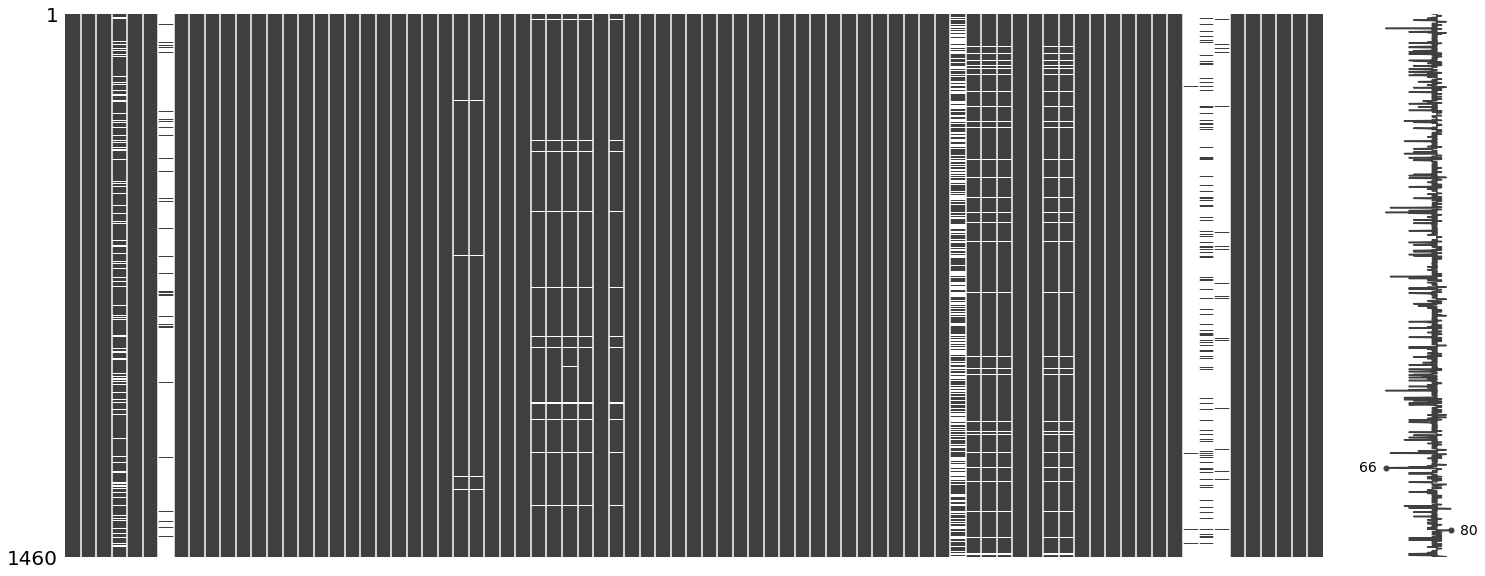


Relatorio de zeros
O df apresenta valores zero e as cinco colunas com maior concentração de miss são:
          colunas  %_zeros
17       PoolArea    99.52
15      3SsnPorch    98.36
6    LowQualFinSF    98.22
18        MiscVal    96.44
8    BsmtHalfBath    94.38
16    ScreenPorch    92.05
2      BsmtFinSF2    88.56
14  EnclosedPorch    85.75
9        HalfBath    62.53
0      MasVnrArea    59.30
7    BsmtFullBath    58.63
5        2ndFlrSF    56.78
12     WoodDeckSF    52.12
10     Fireplaces    47.26
13    OpenPorchSF    44.93
1      BsmtFinSF1    31.99
3       BsmtUnfSF     8.08
11     GarageArea     5.55
4     TotalBsmtSF     2.53

Correlacao de Pearson: (5 primeiras linhas)
         coluna  correlacao
37    SalePrice    1.000000
4   OverallQual    0.790982
16    GrLivArea    0.708624
26   GarageCars    0.640409
27   GarageArea    0.623431


In [ ]:
relatorio(data, 'SalePrice')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


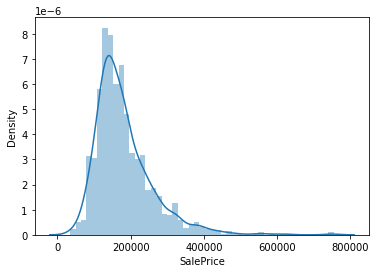

In [ ]:
 sns.distplot(data['SalePrice'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


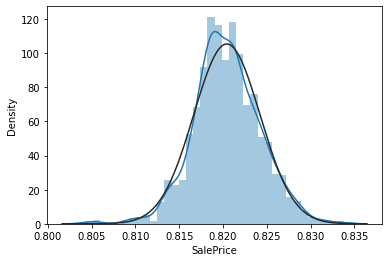

In [ ]:
#normalizando o alvo
from scipy.stats import norm, skew

data['SalePrice'] = np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'], fit=norm)

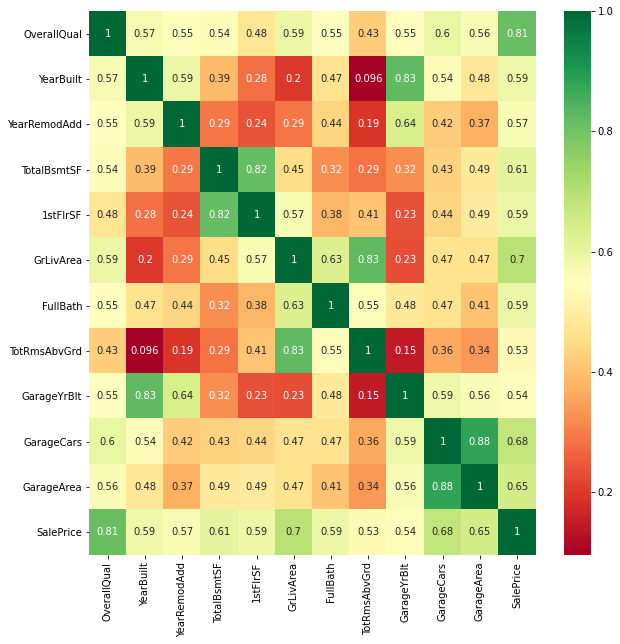

In [ ]:
corr = data.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
print('''
What we note?
It's important to know what you do and how benefit from it. We can see 'OverQual' in the top of highest correlation it's 0.79!
'GarageCars' & 'GarageArea' like each other (correlation between them is 0.88)
'TotalBsmtSF' & '1stFlrSF' also like each other (correlation betwwen them is 0.82), so we can keep either one of them or add the1stFlrSF to the Toltal.
'TotRmsAbvGrd' & 'GrLivArea' also has a strong correlation (0.83), I decided to keep 'GrLivArea' because it's correlation with 'SalePrice' is higher.''')

In [ ]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.813938
GrLivArea        0.695265
GarageCars       0.679802
GarageArea       0.648929
TotalBsmtSF      0.607799
FullBath         0.593452
1stFlrSF         0.592022
YearBuilt        0.588329
YearRemodAdd     0.567139
GarageYrBlt      0.543123
TotRmsAbvGrd     0.530934
Fireplaces       0.487946
MasVnrArea       0.423124
BsmtFinSF1       0.368548
LotFrontage      0.353593
WoodDeckSF       0.332601
OpenPorchSF      0.317731
2ndFlrSF         0.316953
HalfBath         0.314817
LotArea          0.254537
BsmtFullBath     0.235421
BsmtUnfSF        0.220541
BedroomAbvGr     0.212828
ScreenPorch      0.121526
PoolArea         0.067899
MoSold           0.057423
3SsnPorch        0.055479
BsmtFinSF2       0.006824
BsmtHalfBath    -0.002989
Id              -0.017054
MiscVal         -0.019908
OverallCond     -0.030261
YrSold          -0.038151
LowQualFinSF    -0.038645
MSSubClass      -0.071823
KitchenAbvGr    -0.147036
EnclosedPorch   -0.150147
Name: SalePr

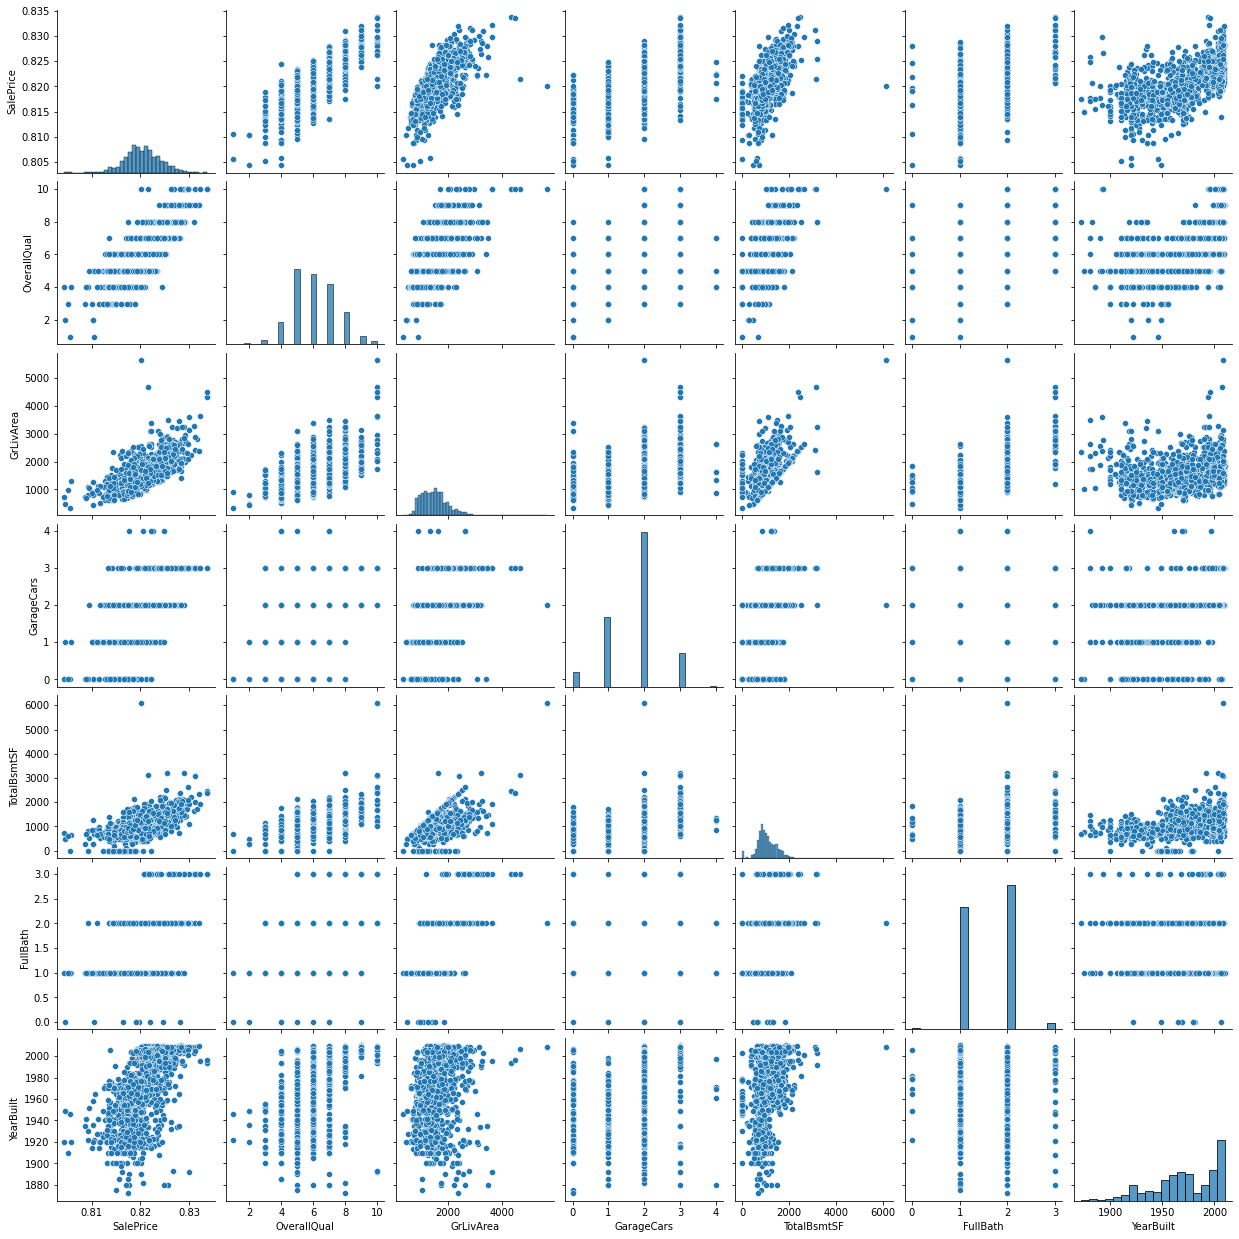

In [ ]:
#ok let's focus on the features have highest correlation.
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols])

### Montando os dataframes categóricos (alta e baixa cardinalidade) e numéricos

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_train = data.copy()
id = data_train['Id']
y = data_train['SalePrice']
#Dropando id, alvo e features com mais de 90% de miss ou zeros:
data_train = data_train.drop(['Id', 'SalePrice', 'PoolQC', 'MiscFeature', 'Alley', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch'], axis=1)

In [ ]:
unique_cat(data_train)

,coluna_cat,quantidade de unique
7,Neighborhood,25
15,Exterior2nd,16
14,Exterior1st,15
38,SaleType,9
8,Condition1,9
11,HouseStyle,8
13,RoofMatl,8
9,Condition2,8
23,BsmtFinType1,7
30,Functional,7


In [ ]:
# As 3 primeiras linhas do df acima se referem a colunas categóricas com
# mais de 10 domínios.
# Vamos classificá-los como categóricos de alta cardinalidade. 
lista_categoricoAltaC = list(unique_cat(data_train).iloc[0:3, 0])
df_categoricoAltaC = data_train[lista_categoricoAltaC]

In [ ]:
#Os demais serão categóricos de baixa cardinalidade
lista_categoricoBaixaC = list(unique_cat(data_train).iloc[4:, 0])
df_categoricoBaixaC = data_train[lista_categoricoBaixaC]

In [ ]:
#df_numérico
lista_numerico = []
for column in data_train.columns:
        if data_train[column].dtype == 'int64' or data_train[column].dtype == 'float64':
            lista_numerico.append(column)

df_numerico = data_train[lista_numerico]
df_numerico

### Preenchendo valores miss no df numérico

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_numerico)
df_numerico_tratado = pd.DataFrame(imp_mean.transform(df_numerico), columns=df_numerico.columns)
df_numerico_tratado.index = df_numerico.index

#### Normalizando df_numerico

In [ ]:
skewed_feats = df_numerico.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

LotArea          12.195142
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
YearRemodAdd     -0.503044
YearBuilt        -0.612831
dtype: float64

In [ ]:
for feature in high_skew.index:
    df_numerico_tratado[feature] = np.log1p(df_numerico_tratado[feature])

#### Transformando as categóricas em numéricas

In [ ]:
#Categórico de alta cardinalidade

df_categoricoAltaC = df_categoricoAltaC.fillna('Miss')

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df_categoricoAltaC_encodado = df_categoricoAltaC.copy()

df_categoricoAltaC_encodado['Neighborhood'] = LE.fit_transform(df_categoricoAltaC_encodado['Neighborhood'])
df_categoricoAltaC_encodado['Exterior1st'] = LE.fit_transform(df_categoricoAltaC_encodado['Exterior1st'])
df_categoricoAltaC_encodado['Exterior2nd'] = LE.fit_transform(df_categoricoAltaC_encodado['Exterior2nd'])

In [ ]:
#Categórico de baixa cardinalidade
df_categoricoBaixaC_dummy = pd.get_dummies(df_categoricoBaixaC, dummy_na = True, drop_first=True)

#### Juntando os df

In [ ]:
#df2 = df_categoricoAltaC_encodado + df_numerico_tratado
#df3 = df2 + df_categoricoBaixaC_dummy

df2 = pd.merge(df_categoricoAltaC_encodado, df_numerico_tratado, how= 'left', left_index= True, right_index= True)
df3 = pd.merge(df2, df_categoricoBaixaC_dummy, how= 'left', left_index= True, right_index= True)

#### Colocando em escala

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df3)

abt_train = pd.DataFrame(scaler.transform(df3), columns = df3.columns)
abt_train.index = data_train.index

#Testando modelos

In [ ]:
from sklearn.model_selection import train_test_split

X_desenv, X_valid, y_desenv, y_valid = train_test_split(abt_train, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.metrics import mean_squared_error

# scorer = make_scorer(mean_squared_error,greater_is_better = False)
# def rmse_CV_desenv(model):
#     kf = KFold(5,shuffle=True,random_state=42).get_n_splits(X_desenv.values)
#     rmse = np.sqrt(-cross_val_score(model, X_desenv, y_desenv, scoring ="neg_mean_squared_error",cv=kf))
#     return (rmse)
# def rmse_CV_valid(model):
#     kf = KFold(5,shuffle=True,random_state=42).get_n_splits(desenv.values)
#     rmse = np.sqrt(-cross_val_score(model, X_valid, y_valid,scoring ="neg_mean_squared_error",cv=kf))
#     return (rmse)

In [ ]:
import xgboost as XGB

model = XGB.XGBRegressor()
model.fit(X_desenv, y_desenv)

[18:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_squared_error
erro_desenv = mean_squared_error(y_desenv, model.predict(X_desenv))
erro_desenv

6.665365519385786e-07

In [ ]:
erro_valid = mean_squared_error(y_valid, model.predict(X_valid))
erro_valid

1.7559752878138513e-06

In [ ]:
erro_valid - erro_desenv

1.0894387358752727e-06

## Teste